In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
df.shape

(400, 9)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.rename(columns={"Chance of Admit ": "Chance of Admit"}, inplace=True)

In [ ]:
df.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
df['Chance of Admit'] = bi.fit_transform(df[['Chance of Admit']])


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [ ]:
x=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [ ]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [ ]:
y=y.astype('int')

In [ ]:
y.head()

,Chance of Admit
0,1
1,1
2,0
3,1
4,0


<Axes: xlabel='Chance of Admit', ylabel='count'>

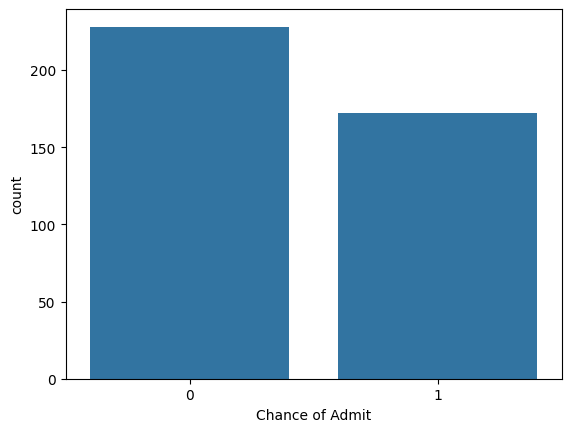

In [ ]:
sns.countplot( x=y)

In [ ]:
y.value_counts()

,count
Chance of Admit,
0,228
1,172


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(320, 8)

In [ ]:
x_test.shape

(80, 8)

In [ ]:
x_train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,4,322,110,3,3.5,2.5,8.67,1
18,19,318,110,3,4.0,3.0,8.80,0
202,203,340,120,5,4.5,4.5,9.91,1
250,251,320,104,3,3.0,2.5,8.57,1
274,275,315,100,1,2.0,2.5,7.95,0


In [ ]:
# import classifaication class
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# create object of the classs
classifier=DecisionTreeClassifier()

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
result


,Actual,Predicted
209,0,0
280,0,0
33,1,1
210,1,1
93,0,0
...,...,...
246,0,1
227,0,0
369,0,0
176,1,1


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay ,accuracy_score
from sklearn.metrics import classification_report

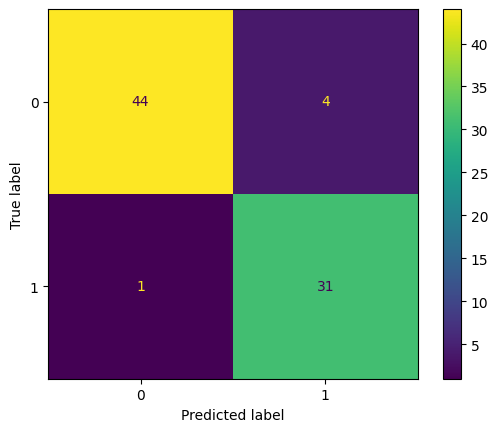

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.9375

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.89      0.97      0.93        32

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

